In [1]:
import cv2
import torch
import torchvision.transforms as T
from gymplatformer import make

import matplotlib.pyplot as plt

from entities.agent import Agent
from entities.dqn import DQN

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


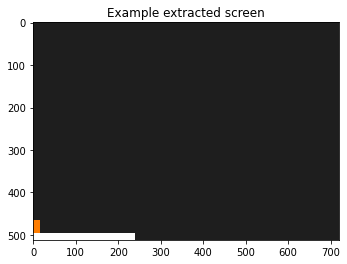

In [2]:
continuous_env = make("PlatformerEnv")

device = torch.device("cpu")

continuous_env.reset()
continuous_env.step(5)

resize = T.Compose(
    [
        T.ToPILImage(),
        # T.Resize((27,126)),
        T.ToTensor(),
    ]
)

# Get number of actions from gym action space
n_actions = continuous_env.action_space.n
# Initializes agent
agent = Agent(n_actions)

# init_screen = get_screen(discrete_env)
init_screen = agent.observe_env(continuous_env, resize, device)

plt.figure()
plt.imshow(init_screen.cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

In [3]:
_, _, screen_height, screen_width = init_screen.shape
policy_net = DQN(screen_height, screen_width, n_actions).to(device)

45


In [4]:
print(policy_net)

DQN(
  (conv): Conv2d(3, 4, kernel_size=(8, 8), stride=(8, 8))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=5760, out_features=2880, bias=True)
  (lin2): Linear(in_features=2880, out_features=6, bias=True)
)


In [5]:
output = policy_net(init_screen)
output

tensor([[-0.0132,  0.0080,  0.0078, -0.0161, -0.0072, -0.0152]],
       grad_fn=<AddmmBackward>)

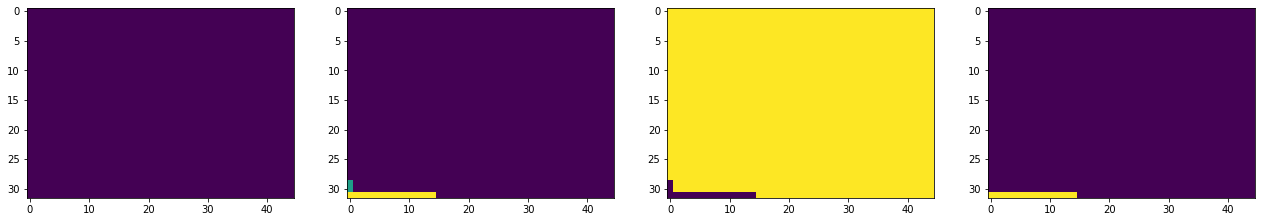

In [4]:
output = policy_net(init_screen)

fig, axs = plt.subplots(1, output.shape[1], figsize=(22, 10))

for depth in range(output.shape[1]):
    img = output.detach().numpy()[0][depth]
    axs[depth].imshow(img)